# Xử lý ngôn ngữ tự nhiên - NLP

* Họ và tên: Hồ Thịnh
* MSSV: 19522274


Các đánh giá của thực khách đến nhà hàng là một phần quan trọng để phát triển nhà hàng. Dựa trên đánh giá này nhà hàng có thể đưa ra các cải tiến phù hợp cho sau này. Tuy nhiên, có nhiều loại đánh giá khác nhau, chúng ta cần phân loại chúng để xử lý.

Dữ liệu được cung cấp bao gồm các các nhận xét của thực khách về nhà hàng và được phân làm hai loại thích và không thích.


**Yêu cầu:**
1. Tạo tập dữ liệu từ dữ liệu thô (**Restaurant_Reviews.csv**):
    - Làm sạch dữ liệu (có thể dùng thư viện nltk để hỗ trợ), dùng wordcloud để visualize dữ liệu, chia dữ liệu ra làm 2 phần huấn luyện, kiểm ra với tỉ lệ 8:2
    - Dùng mô hình Bags of Words để huyển dữ liệu về dạng vector
    - Chia tập dữ liệu thành 2 phần để huấn luyện và kiểm tra mô hình
3. Dùng mô hình Naive Bayes để phân loại các đánh giá

#Import package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB


In [5]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Loading and Preprocessing Data

In [2]:
df = pd.read_csv("/content/Restaurant_Reviews.tsv",delimiter="\t")
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


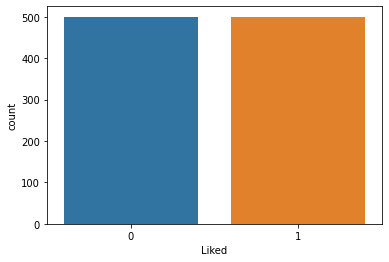

In [4]:
sns.countplot(x='Liked', data=df)

In [9]:
ps = PorterStemmer()
reviews = []
for i in range(len(df)):
    #replace non-[a-z] character by space
    review = re.sub("[^a-zA-Z]"," ",df["Review"][i])
    #lower case all character to decrease input dim 
    review = review.lower()
    #remove unnecessary space
    review = review.split()
    #stemming and remove stopwork -> bag of words
    review = [ps.stem(word) for word in review if not word in str(stopwords.words("english"))]
    reviews.append(" ".join(review))

In [8]:
reviews[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

#Split Data to Train/Test

In [10]:
cv = CountVectorizer(max_features = 1500)

In [11]:
# Select undependent variables and converting to array
X = cv.fit_transform(reviews).toarray()
# Select dependent variables
y = df["Liked"].values

print(X)
print("X shape ",X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X shape  (1000, 1500)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Naive Bayes Training and Evaluation

In [13]:
# to store accuracy scores
algorithms = {}
#define NB versions 
nb_algorithms = [BernoulliNB,GaussianNB,MultinomialNB]
for algorithm in nb_algorithms:
    #trainning
    model = algorithm().fit(X_train,y_train)
    #predict on testset for evaluation
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    
    print(f'-- Algorithm: {algorithm.__name__}\nConfusion Matrix:\n\n {cm} \n\nAccuracy Score: {accuracy_score(y_test,y_pred)}\n Classification Report:\n\n{classification_report(y_test,y_pred)}\n{"-"*25}')
    algorithms[algorithm.__name__] = accuracy_score(y_test,y_pred)

-- Algorithm: BernoulliNB
Confusion Matrix:

 [[73 24]
 [21 82]] 

Accuracy Score: 0.775
 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        97
           1       0.77      0.80      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200

-------------------------
-- Algorithm: GaussianNB
Confusion Matrix:

 [[55 42]
 [12 91]] 

Accuracy Score: 0.73
 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200

-------------------------
-- Algorithm: MultinomialNB
Confusion Matrix:

 [[72 25]
 [21 82]] 


In [20]:
print("--All Accuracy--")
algorithms

--All Accuracy--


{'BernoulliNB': 0.775, 'GaussianNB': 0.73, 'MultinomialNB': 0.77}